In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\aleks\\Desktop\\courseML\\DATA\\mouse_viral_study.csv')

In [8]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


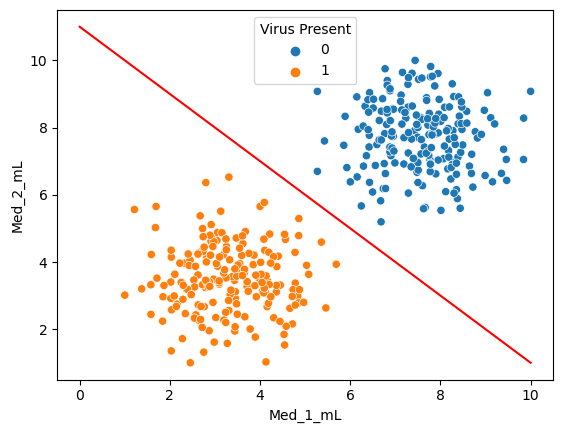

In [14]:
sns.scatterplot(data = df, x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present')
x = np.linspace(0,10,100)
m = -1
b = 11
y = m * x + b

plt.plot(x,y,'red')

In [18]:
from sklearn.svm import SVC

In [21]:
SVC

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [22]:
y = df['Virus Present']
X = df.drop('Virus Present', axis = 1)

In [23]:
model = SVC(kernel='linear', C = 1000)

In [24]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [29]:
from svm_margin_plot import plot_svm_boundary

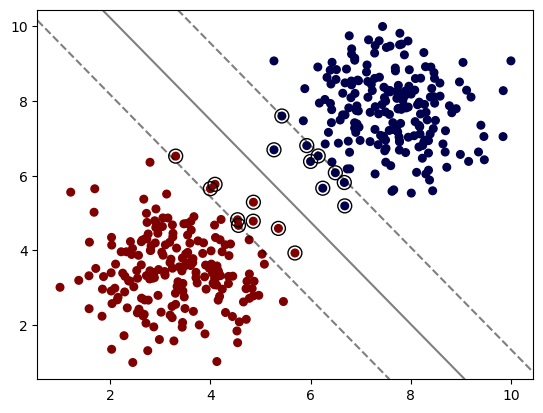

In [30]:
model = SVC(kernel = 'linear', C = 0.05)
model.fit(X,y)
plot_svm_boundary(model, X, y)

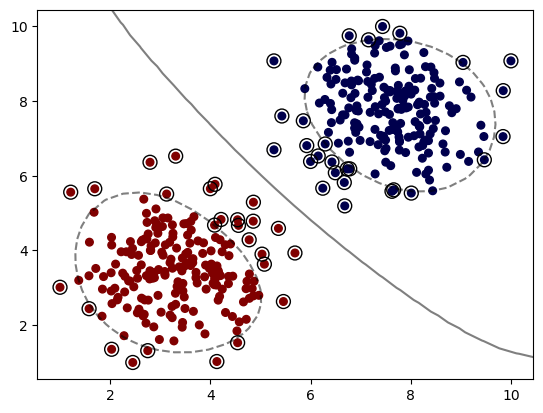

In [35]:
model = SVC(kernel = 'rbf', C = 0.1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

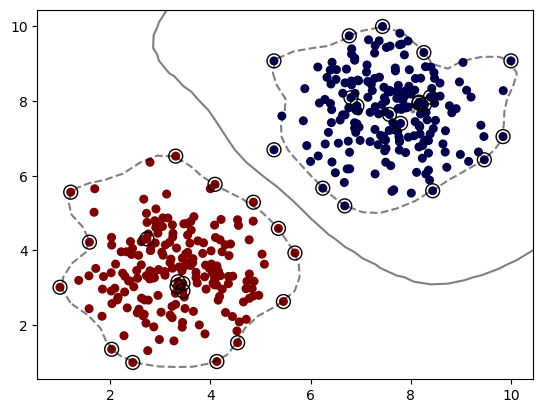

In [37]:
model = SVC(kernel = 'rbf', C = 1, gamma = 'auto') #auto = 1 / len(features)
model.fit(X,y)
plot_svm_boundary(model, X, y)

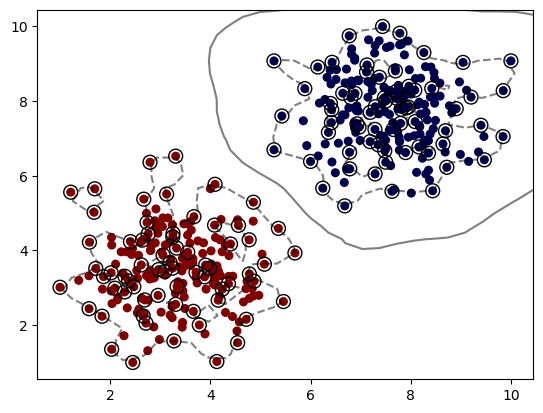

In [38]:
model = SVC(kernel = 'rbf', C = 1, gamma = 2)
model.fit(X,y)
plot_svm_boundary(model, X, y)

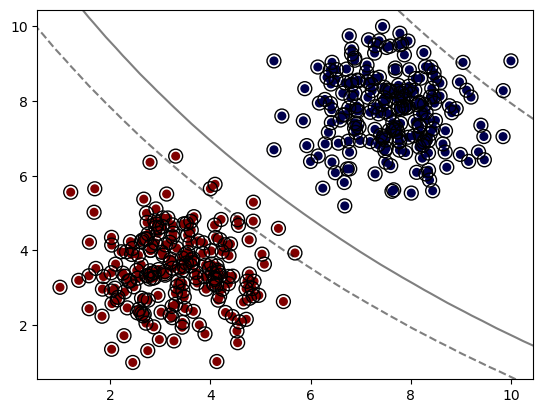

In [39]:
model = SVC(kernel = 'sigmoid') #auto = 1 / len(features)
model.fit(X,y)
plot_svm_boundary(model, X, y)

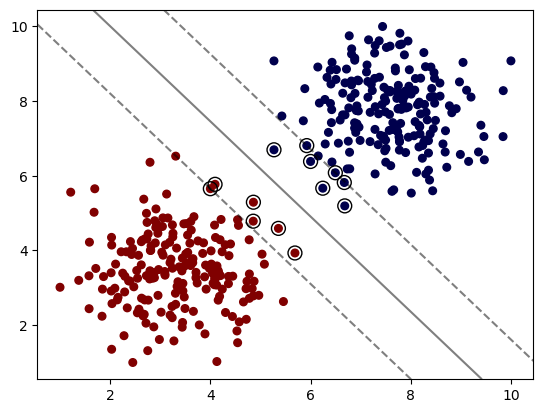

In [47]:
model = SVC(kernel = 'poly', degree=1) #auto = 1 / len(features)
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [49]:
df = pd.read_csv('..\\DATA\\cement_slump.csv')

In [50]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

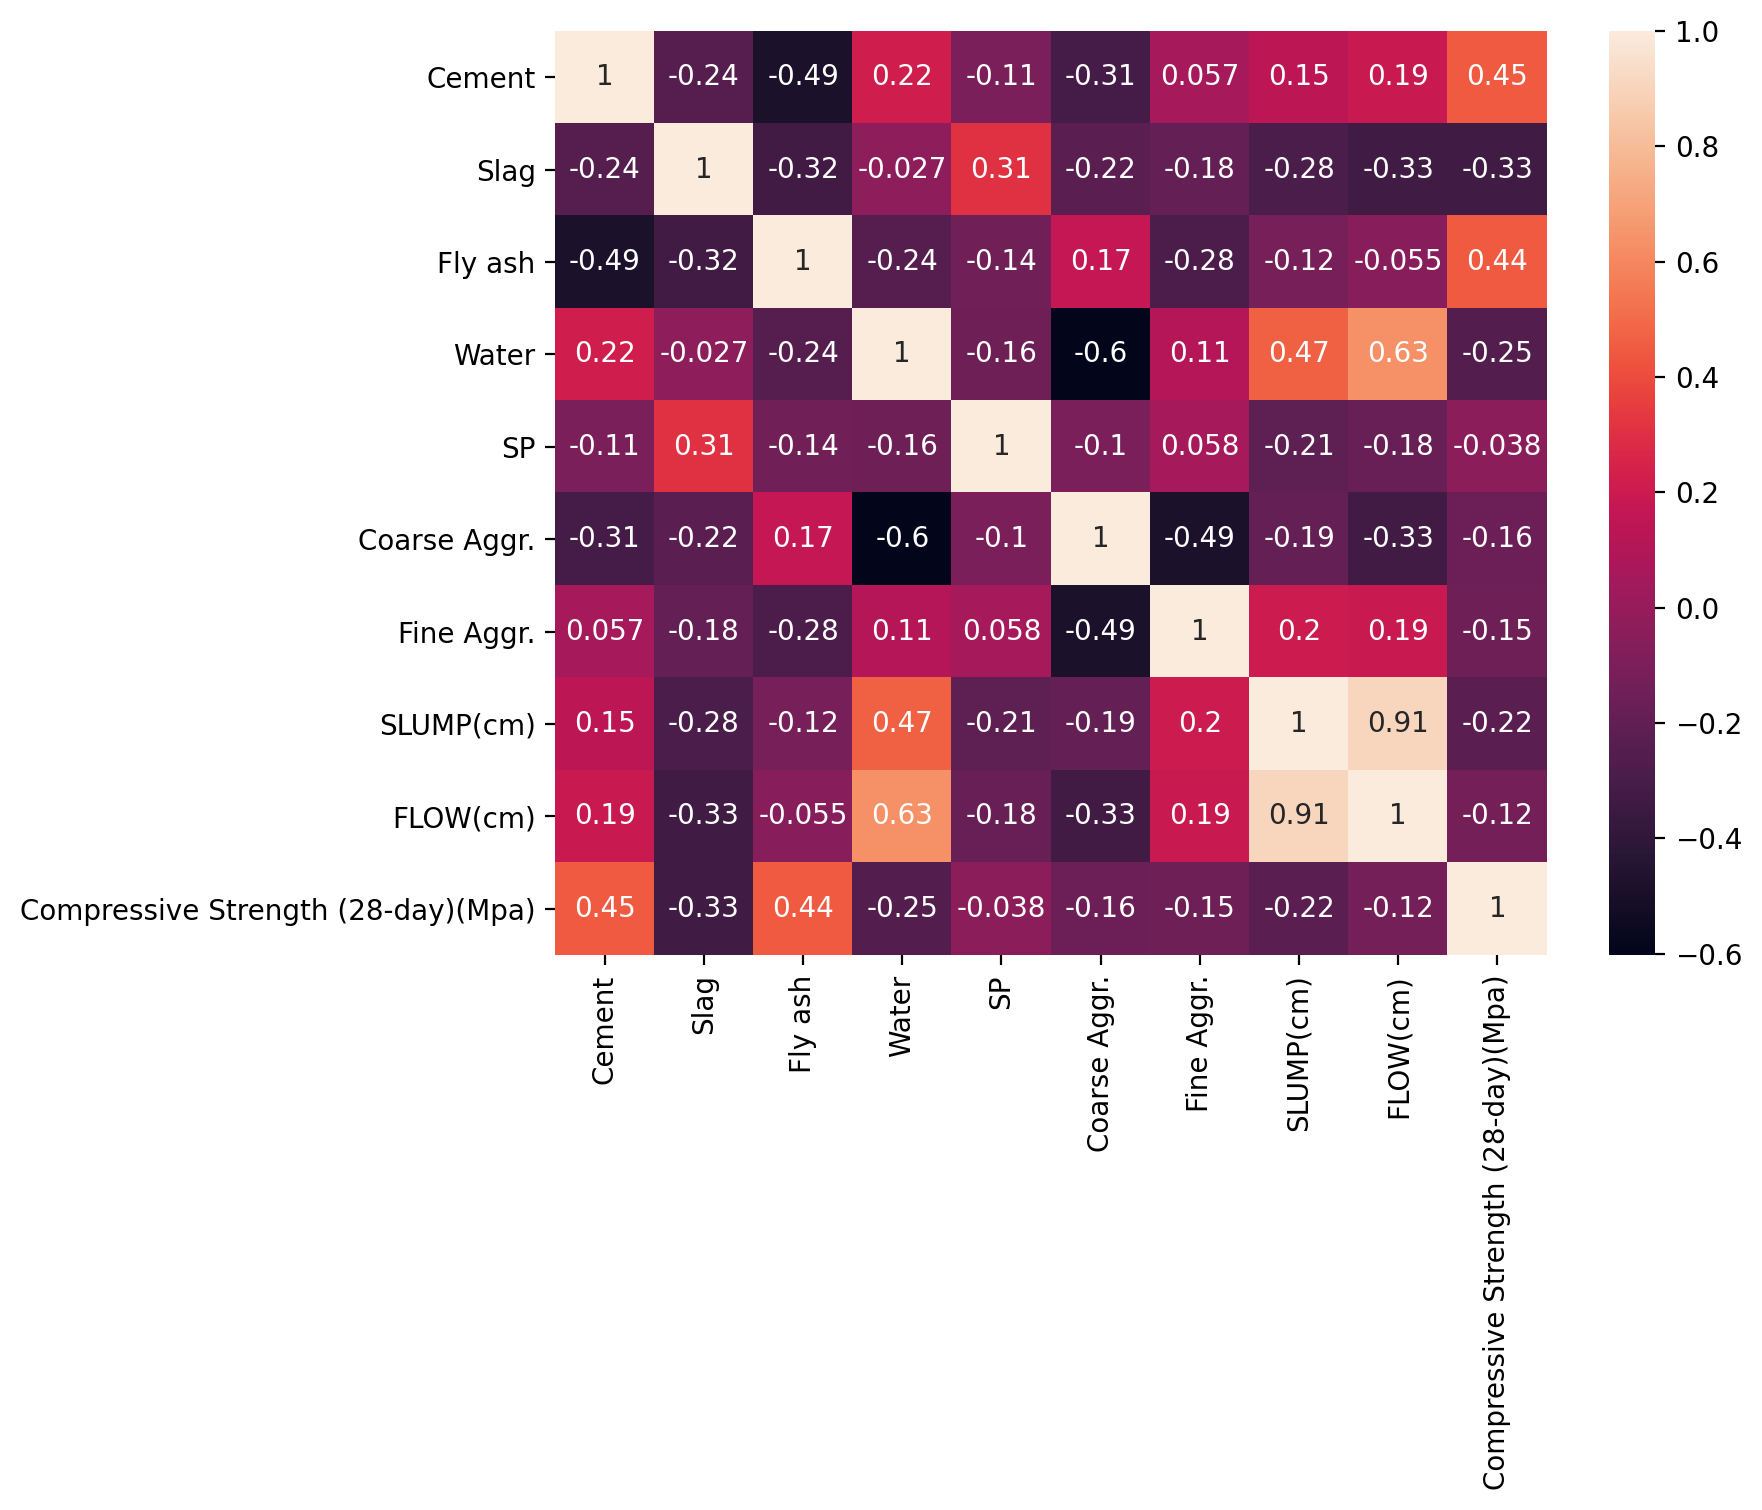

In [54]:
plt.figure(figsize = (8,6), dpi = 200)
sns.heatmap(df.corr(), annot = True)

In [55]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [57]:
X= df.drop('Compressive Strength (28-day)(Mpa)', axis = 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
from sklearn.svm import SVR, LinearSVR

In [61]:
base_model = SVR()
base_model.fit(scaled_X_train, y_train)

SVR()

In [62]:
base_preds = base_model.predict(scaled_X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(base_preds, y_test)

5.236902091259178

In [64]:
np.sqrt(mean_squared_error(base_preds, y_test))

6.695914838327133

In [65]:
y_test.mean()

36.26870967741935

In [68]:
param_grid = {'C':[.001, .01, .1, .5, 1],
             'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[1,2,3,4],
             'epsilon':[0,0.1,0.5,1,2]}

In [69]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [1, 2, 3, 4], 'epsilon': [0, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
grid.best_params_

{'C': 1, 'degree': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [71]:
grid_pred = grid.predict(scaled_X_test)
mean_absolute_error(y_test,grid_pred)

2.5128012210762365

In [72]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.178210305119858